## Import Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
print('sklearn version:',sklearn.__version__)

sklearn version: 1.7.2


## Load the Preprocessed Dataset

In [3]:
df = pd.read_csv('cardio_cleaned.csv')

In [4]:
df.head()

,age,gender,height,weight,high_bp,low_bp,smoke,alco,active,cardio,BMI,pulse_pressure,cholesterol_level_2,cholesterol_level_3,glucose_level_2,glucose_level_3
0,50,1,168,62.0,110,80,0,0,1,0,21.967120,30,0,0,0,0
1,55,0,156,85.0,140,90,0,0,1,1,34.927679,50,0,1,0,0
2,51,0,165,64.0,130,70,0,0,0,1,23.507805,60,0,1,0,0
3,48,1,169,82.0,150,100,0,0,1,1,28.710479,50,0,0,0,0
4,47,0,156,56.0,100,60,0,0,0,0,23.011177,40,0,0,0,0


In [5]:
df.shape

(65306, 16)

In [6]:
df['cardio'].value_counts(normalize=True)

cardio
1    0.50712
0    0.49288
Name: proportion, dtype: float64

## Split Dataset into Features (X) and Target (y)

In [7]:
x = df.drop('cardio',axis=1)

In [8]:
y = df['cardio']

In [9]:
x.head()

,age,gender,height,weight,high_bp,low_bp,smoke,alco,active,BMI,pulse_pressure,cholesterol_level_2,cholesterol_level_3,glucose_level_2,glucose_level_3
0,50,1,168,62.0,110,80,0,0,1,21.967120,30,0,0,0,0
1,55,0,156,85.0,140,90,0,0,1,34.927679,50,0,1,0,0
2,51,0,165,64.0,130,70,0,0,0,23.507805,60,0,1,0,0
3,48,1,169,82.0,150,100,0,0,1,28.710479,50,0,0,0,0
4,47,0,156,56.0,100,60,0,0,0,23.011177,40,0,0,0,0


In [10]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: cardio, dtype: int64

## Split Data into Training and Testing Sets

In [11]:
x_train,x_test,y_train,y_test = train_test_split(
    x,y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [12]:
x_train.shape

(52244, 15)

In [13]:
x_test.shape

(13062, 15)

In [14]:
y_train.value_counts(normalize=True)

cardio
1    0.50712
0    0.49288
Name: proportion, dtype: float64

In [15]:
y_test.value_counts(normalize=True)

cardio
1    0.50712
0    0.49288
Name: proportion, dtype: float64

## Apply Feature Scaling Using StandardScaler

In [16]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [17]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [18]:
x_train_scaled.head()

,age,gender,height,weight,high_bp,low_bp,smoke,alco,active,BMI,pulse_pressure,cholesterol_level_2,cholesterol_level_3,glucose_level_2,glucose_level_3
0,0.756045,-0.742482,0.449769,-0.031099,-0.412485,-0.145844,-0.316321,-0.243046,-1.986558,-0.259086,-0.470556,2.464229,-0.368026,-0.289384,-0.293058
1,-0.419121,-0.742482,-0.179455,-0.310087,0.766917,-0.145844,-0.316321,-0.243046,0.503383,-0.234621,1.212552,-0.405806,-0.368026,-0.289384,-0.293058
2,1.490523,-0.742482,1.456526,-0.728569,0.177216,-0.145844,-0.316321,-0.243046,-1.986558,-1.324032,0.370998,2.464229,-0.368026,-0.289384,-0.293058
3,-0.859808,-0.742482,-0.556989,-1.914269,-2.181588,-3.263727,-0.316321,-0.243046,0.503383,-1.765094,-0.470556,2.464229,-0.368026,-0.289384,-0.293058
4,-0.125330,-0.742482,-0.934523,-0.868064,-0.412485,-0.145844,-0.316321,-0.243046,0.503383,-0.463287,-0.470556,-0.405806,-0.368026,-0.289384,-0.293058


#  Model 1: Logistic Regression - Baseline Model

In [19]:
log_reg = LogisticRegression(
    max_iter=1000,
    random_state=42
)
log_reg.fit(x_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [20]:
y_train_pred = log_reg.predict(x_train_scaled)
y_test_pred = log_reg.predict(x_test_scaled)

## Evaluate Model Accuracy on Training and Testing Data

In [21]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_acc, f"({train_acc * 100:.2f}%)")
print("Test Accuracy :", test_acc,  f"({test_acc * 100:.2f}%)")

Train Accuracy: 0.7251167598193093 (72.51%)
Test Accuracy : 0.7263053131220334 (72.63%)


## Display Confusion Matrix for Test Data

In [22]:
print("\nConfusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred))


Confusion Matrix (Test):
[[4953 1485]
 [2090 4534]]


## Generate Classification Report

In [23]:
print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred))


Classification Report (Test):
              precision    recall  f1-score   support

           0       0.70      0.77      0.73      6438
           1       0.75      0.68      0.72      6624

    accuracy                           0.73     13062
   macro avg       0.73      0.73      0.73     13062
weighted avg       0.73      0.73      0.73     13062



## Calculate Feature Importance

In [24]:
features = x_train.columns

coefficients = log_reg.coef_[0]

feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

feature_importance['Abs_Coeff'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values('Abs_Coeff', ascending=False)

feature_importance

,Feature,Coefficient,Abs_Coeff
4,high_bp,0.453162,0.453162
5,low_bp,0.389939,0.389939
12,cholesterol_level_3,0.350159,0.350159
0,age,0.333042,0.333042
10,pulse_pressure,0.330954,0.330954
11,cholesterol_level_2,0.116201,0.116201
14,glucose_level_3,-0.093677,0.093677
3,weight,0.076198,0.076198
8,active,-0.075904,0.075904
9,BMI,0.070682,0.070682


## Visualize Feature Importance Using a Bar Chart

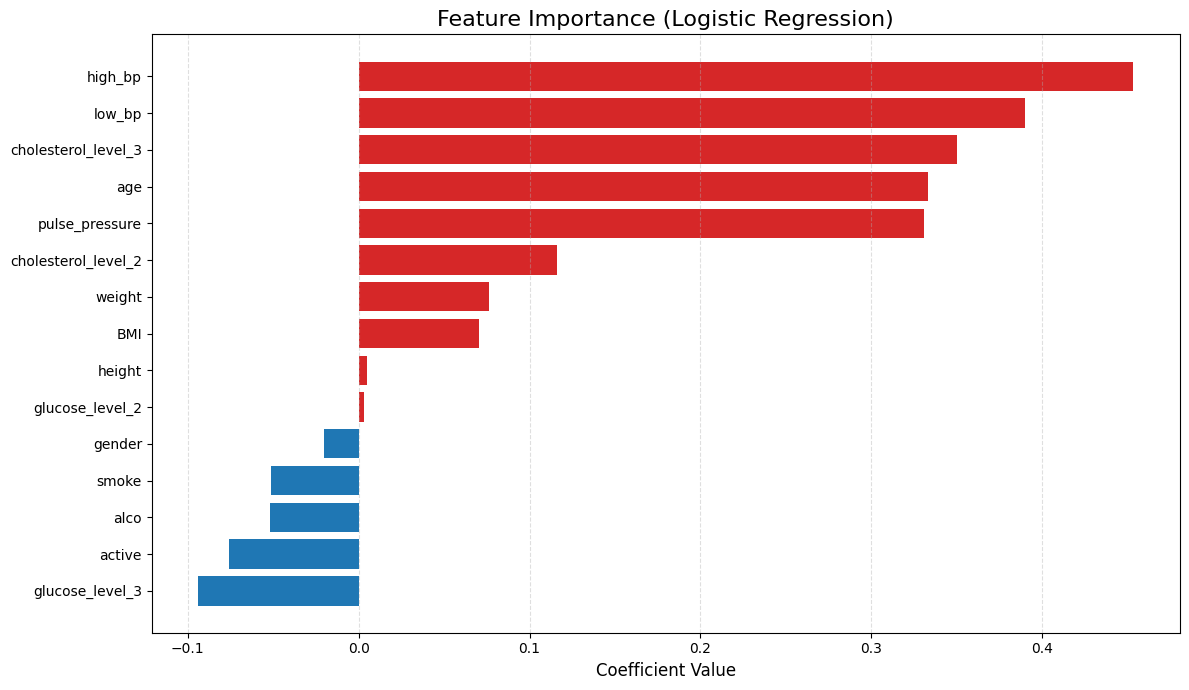

In [25]:
feature_importance = feature_importance.sort_values("Coefficient")

plt.figure(figsize=(12, 7))

colors = ['#d62728' if c > 0 else '#1f77b4' for c in feature_importance['Coefficient']]
# red  = higher risk (positive coefficient)
# blue = lower risk (negative coefficient)

plt.barh(feature_importance['Feature'], 
         feature_importance['Coefficient'], 
         color=colors)

plt.xlabel("Coefficient Value", fontsize=12)
plt.title("Feature Importance (Logistic Regression)", fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

# Model 2: Decision Tree - Accuracy Evaluation

In [27]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(
    max_depth=6,
    random_state=42
)

dt_model.fit(x_train_scaled, y_train)

y_train_pred_dt = dt_model.predict(x_train_scaled)
y_test_pred_dt = dt_model.predict(x_test_scaled)

dt_train_acc = accuracy_score(y_train, y_train_pred_dt)
dt_test_acc = accuracy_score(y_test, y_test_pred_dt)

print("Decision Tree Train Accuracy:", dt_train_acc)
print("Decision Tree Test Accuracy :", dt_test_acc)

Decision Tree Train Accuracy: 0.7323137585177245
Decision Tree Test Accuracy : 0.7250038278977186


# Model 3: Random Forest - Accuracy Evaluation

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(x_train_scaled, y_train)

y_train_pred_rf = rf_model.predict(x_train_scaled)
y_test_pred_rf = rf_model.predict(x_test_scaled)

rf_train_acc = accuracy_score(y_train, y_train_pred_rf)
rf_test_acc = accuracy_score(y_test, y_test_pred_rf)

print("Random Forest Train Accuracy:", rf_train_acc)
print("Random Forest Test Accuracy :", rf_test_acc)

Random Forest Train Accuracy: 0.7491577980246535
Random Forest Test Accuracy : 0.729061399479406


## Model Comparison Summary

In [29]:
accuracy_comparison = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Decision Tree",
        "Random Forest"
    ],
    "Train Accuracy": [
        train_acc,
        dt_train_acc,
        rf_train_acc
    ],
    "Test Accuracy": [
        test_acc,
        dt_test_acc,
        rf_test_acc
    ]
})

accuracy_comparison

,Model,Train Accuracy,Test Accuracy
0,Logistic Regression,0.725117,0.726305
1,Decision Tree,0.732314,0.725004
2,Random Forest,0.749158,0.729061


## Save All Trained Models and Preprocessing Scaler

In [32]:
joblib.dump(log_reg,"cardio_lr_model.pkl")
joblib.dump(dt_model,"cardio_dt_model.pkl")
joblib.dump(rf_model,"cardio_rf_model.pkl")
joblib.dump(scaler,"cardio_scaler.pkl")

print("All models and scaler saved successfully!")

All models and scaler saved successfully!
